## Data Bootcamp Final Project
##### *Deven Patnaik, Catherine Sang, and Salomon Ruiz*

This dataset (cited in README.md) describes each Premier League soccer match in the 2010 through 2021 seasons. With this data, we seek to answer the question, "Do penalties affect the result of a match?" We define "penalties" as offsides calls, yellow cards, and red cards. We examine this question by 1) comparing the result of each match to the total penalties of the match and 2) comparing the result of each match to the teams' difference in penalties.

Hypotheses:
* Comparing Match Result to Total Penalties: Each penalty type has a statistically significant negative correlation with match result. Total penalties has a statistically significant negative correlation with match result.
* Comparing Match Result to Difference in Penalties: Each difference in penalty type has a statistically significant negative correlation with match result. Difference in total penalties has a statistically significant negative correlation with match result. 

We chose this data not because we are interested in the Premier League, but because we are curious about the relevance our question to other sports. Understanding the relevance of penalties to scores in soccer might hint a their relevance in football, basketball, and hockey.

### Contents

*i. Reading in the Data*

*ii. Shaping, Cleaning, and Filtering*

*iii. Understanding the Dataset and Making Assumptions*

I. Comparing Match Result to Total Penalties 
* Match Result vs. Total Offsides Calls
* Match Result vs. Total Yellow Cards
* Match Result vs. Total Red Cards
* Match Result vs. Total Penalties
* Supervised Learning Models

II. Comparing Match Result to Difference in Penalties
* Match Result vs. Difference in Offsides Calls
* Match Result vs. Difference in Yellow Cards
* Match Result vs. Difference in Red Cards
* Match Result vs. Difference in Total Penalties
* Supervised Learning Models

V. Discussion

#### *i. Reading in the Data*

In [1]:
import numpy as np
import pandas as pd                    
import matplotlib as mpl               
import datetime as dt                  
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor as rf
%matplotlib inline
df = pd.read_csv('df_full_premierleague.csv')
df

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,https://www.premierleague.com/match/59113,20/21,2021-02-03,Liverpool,Brighton and Hove Albion,0-1,0-0,15.0,5.0,...,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67,-3.0,33.3
4066,4066,https://www.premierleague.com/match/59177,20/21,2021-03-03,Burnley,Leicester City,1-1,1-1,13.0,5.0,...,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58,5.0,62.8
4067,4067,https://www.premierleague.com/match/59178,20/21,2021-03-03,Crystal Palace,Manchester United,0-0,0-0,25.0,4.0,...,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69,4.0,64.1
4068,4068,https://www.premierleague.com/match/59182,20/21,2021-03-03,Sheffield United,Aston Villa,1-0,1-0,47.0,2.0,...,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42,6.0,54.2


#### *ii. Shaping, Cleaning, and Filtering* 
* Title all columns
* Convert date to datetime format
* Delete matches with null, infinite, and empty values
* Reindex by date

In [2]:
# Title all columns
df.columns = [i.title() for i in df.columns]

In [3]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Sort dataframe by date in chronological order
df = df.sort_values(by=['Date'])

In [5]:
# Delete matches with null, infinite, and empty values
df = df.replace([np.inf, -np.inf, 'empty'], np.nan)
df = df.dropna()

In [6]:
# Reindex by date
df = df.set_index(df['Date'])
df

,Unnamed: 0,Link_Match,Season,Date,Home_Team,Away_Team,Result_Full,Result_Ht,Home_Clearances,Home_Corners,...,Tackles_Avg_Away,Touches_Avg_Away,Yellow_Cards_Avg_Away,Goals_Scored_Ft_Avg_Away,Goals_Conced_Ft_Avg_Away,Sg_Match_Ft_Acum_Away,Goals_Scored_Ht_Avg_Away,Goals_Conced_Ht_Avg_Away,Sg_Match_Ht_Acum_Away,Performance_Acum_Away
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-28,177,https://www.premierleague.com/match/7110,10/11,2010-08-28,Manchester United,West Ham United,3-0,1-0,18.0,9.0,...,13.5,550.5,2.0,0.50,3.00,-5.0,0.00,1.00,-2.0,0.0
2010-08-28,174,https://www.premierleague.com/match/7107,10/11,2010-08-28,Blackburn Rovers,Arsenal,1-2,1-1,32.0,4.0,...,17.0,781.0,1.0,3.50,0.50,6.0,1.50,0.00,3.0,66.7
2010-08-28,176,https://www.premierleague.com/match/7109,10/11,2010-08-28,Chelsea,Stoke City,2-0,1-0,24.0,6.0,...,18.0,465.5,2.5,1.00,2.00,-2.0,0.50,2.00,-3.0,0.0
2010-08-28,179,https://www.premierleague.com/match/7112,10/11,2010-08-28,Wolverhampton Wanderers,Newcastle United,1-1,1-0,35.0,5.0,...,20.0,549.0,2.5,3.00,1.50,3.0,1.50,1.00,1.0,50.0
2010-08-29,300,https://www.premierleague.com/match/7113,10/11,2010-08-29,Aston Villa,Everton,1-0,1-0,50.0,4.0,...,16.0,679.5,1.0,0.50,1.00,-1.0,0.50,0.50,0.0,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-06,3923,https://www.premierleague.com/match/59157,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,...,17.4,681.5,1.8,1.70,1.15,15.0,0.78,0.59,5.0,61.7
2021-03-06,3924,https://www.premierleague.com/match/59158,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,...,11.5,689.1,1.4,1.31,1.04,7.0,0.65,0.65,0.0,47.4
2021-03-07,4008,https://www.premierleague.com/match/59164,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,...,13.7,526.8,1.8,1.04,1.69,-17.0,0.35,0.69,-9.0,33.3


#### *iii. Understanding the Dataset and Making Assumptions*

* Interpreting the Home Team vs Away Team Columns
* Testing to Confirm the Dataset is at the Match Level
* Testing to Confirm the Columns, Goal_Home_Ft and Goal_Away_Ft, match up with Result_Full
* Understanding the Size of Dataset
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Number of Seasons
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Number of Matches per Season
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Number of Matches per Team


In [7]:
# Testing to see if the unique values of the Home Team column equal the unique values of the Away Team column
np.array_equal(np.sort(df['Home_Team'].unique()),np.sort(df['Away_Team'].unique()))

True

Because the numpy array_equal function returned true, that means that the unique values of the Home Team column equal the Away Team column. This makes sense because every season the Premier League sets a schedule deciding which team plays as the home team and which team plays as the away team.

In [8]:
# Testing to see if there are any repeat matches
df['Link_Match'].nunique()

3841

There are 3841 unique match links and 3841 rows in our cleaned dataframe, so we can assume that the dataset is at the match level meaning each row represents a unique match.

In [9]:
# Finding the number of seasons in the dataset
df['Season'].nunique()

11

In [10]:
# Finding the unique seasons in the dataset
df['Season'].unique()

array(['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17',
       '17/18', '18/19', '19/20', '20/21'], dtype=object)

There are 11 seasons represented in this dataset from the 2010-2011 season to the 2020-2021 season.

In [11]:
# Finding data type of Column Result_Full
df['Result_Full'].dtype

dtype('O')

In [12]:
# Slicing Result_Full to get the first number of the score, the number of goals scored by the home team
Result_Home = df['Result_Full'].str.strip().str.slice(start=0,stop=1) 
Result_Home

Date
2010-08-28    3
2010-08-28    1
2010-08-28    2
2010-08-28    1
2010-08-29    1
             ..
2021-03-06    1
2021-03-06    1
2021-03-07    0
2021-03-07    0
2021-03-07    0
Name: Result_Full, Length: 3841, dtype: object

In [13]:
# Turning Result_Home into a dataframe
df_temp = pd.DataFrame(Result_Home)
df_temp

,Result_Full
Date,
2010-08-28,3
2010-08-28,1
2010-08-28,2
2010-08-28,1
2010-08-29,1
...,...
2021-03-06,1
2021-03-06,1
2021-03-07,0


In [14]:
# Converting Result_Full column into integer objects
df_temp['Result_Full'] = df_temp['Result_Full'].astype(int)

In [15]:
# Converting Goal_Home_Ft column into integer objects
df['Goal_Home_Ft'] = df['Goal_Home_Ft'].astype(int)

In [16]:
# Testing to Confirm the Columns, Goal_Home_Ft and Goal_Away_Ft, match up with Result_Full
df_temp['Result_Full'].equals(df['Goal_Home_Ft'])

True

Because the sliced Result_Full column equals the Goal_Home_Ft column, we can assume that the number of goals scored by the home team is their score in at the end of the game. 

In [17]:
# Slicing Result_Full to get the second number of the score, the number of goals scored by the away team
Result_Away = df['Result_Full'].str.strip().str.slice(start=2) 

In [18]:
# Turning Result_Home into a dataframe
df_temp2 = pd.DataFrame(Result_Away)
df_temp2

,Result_Full
Date,
2010-08-28,0
2010-08-28,2
2010-08-28,0
2010-08-28,1
2010-08-29,0
...,...
2021-03-06,2
2021-03-06,1
2021-03-07,0


In [19]:
# Converting Result_Full column into integer objects
df_temp2['Result_Full'] = df_temp2['Result_Full'].astype(int)

In [20]:
# Converting Goal_Away_Ft column into integer objects
df['Goal_Away_Ft'] = df['Goal_Away_Ft'].astype(int)

In [21]:
# Testing to Confirm the Columns, Goal_Home_Ft and Goal_Away_Ft, match up with Result_Full
df_temp2['Result_Full'].equals(df['Goal_Away_Ft'])

True

Because the sliced Result_Full column equals the Goal_Away_Ft column, we can also assume that the number of goals scored by the away team is their score in at the end of the game.

In [22]:
# Finding the number of matches per season
df.groupby('Season')['Date'].count()

Season
10/11    358
11/12    359
12/13    359
13/14    360
14/15    360
15/16    358
16/17    359
17/18    359
18/19    360
19/20    360
20/21    249
Name: Date, dtype: int64

Most years, there are 380 matches per yearly season with the exception of the 2015-2016 season and the current season. There are only 271 matches for the 2020-2021 season because the season is not over yet. In terms of the 2015-2016 season, it seems like there were 380 matches played according to [Wikipedia](https://en.wikipedia.org/wiki/2015%E2%80%9316_Premier_League), so there may be a missing entry in the dataset. 

In [23]:
# Finding the number of matches per Home Team
home = df.groupby('Home_Team')[['Link_Match']].count()

In [24]:
# Renaming the index of home
home.index = home.index.rename('Team')

In [25]:
#Renaming the Link_Match column to Num_Matches_h
home.columns = ['Num_Matches_h']
home

,Num_Matches_h
Team,
AFC Bournemouth,90
Arsenal,192
Aston Villa,137
Birmingham City,18
Blackburn Rovers,35
Blackpool,18
Bolton Wanderers,36
Brighton and Hove Albion,66
Burnley,104


In [26]:
# Finding the number of matches per Away Team
away = df.groupby('Away_Team')[['Link_Match']].count()

In [27]:
# Renaming the index of away
away.index = away.index.rename('Team')

In [28]:
# Renaming the Link_Match column to Num_Matches_a
away.columns = ['Num_Matches_a']
away

,Num_Matches_a
Team,
AFC Bournemouth,89
Arsenal,193
Aston Villa,139
Birmingham City,18
Blackburn Rovers,36
Blackpool,17
Bolton Wanderers,36
Brighton and Hove Albion,66
Burnley,102


In [29]:
# Merging dataframes home and away into one dataframe called df_team
df_team = pd.merge(home,away,on='Team')
df_team

,Num_Matches_h,Num_Matches_a
Team,,
AFC Bournemouth,90,89
Arsenal,192,193
Aston Villa,137,139
Birmingham City,18,18
Blackburn Rovers,35,36
Blackpool,18,17
Bolton Wanderers,36,36
Brighton and Hove Albion,66,66
Burnley,104,102


In [30]:
# Making a new column for total matches per team called Num_Matches
df_team['Num_Matches'] = df_team['Num_Matches_h'] + df_team['Num_Matches_a']
df_team

,Num_Matches_h,Num_Matches_a,Num_Matches
Team,,,
AFC Bournemouth,90,89,179
Arsenal,192,193,385
Aston Villa,137,139,276
Birmingham City,18,18,36
Blackburn Rovers,35,36,71
Blackpool,18,17,35
Bolton Wanderers,36,36,72
Brighton and Hove Albion,66,66,132
Burnley,104,102,206


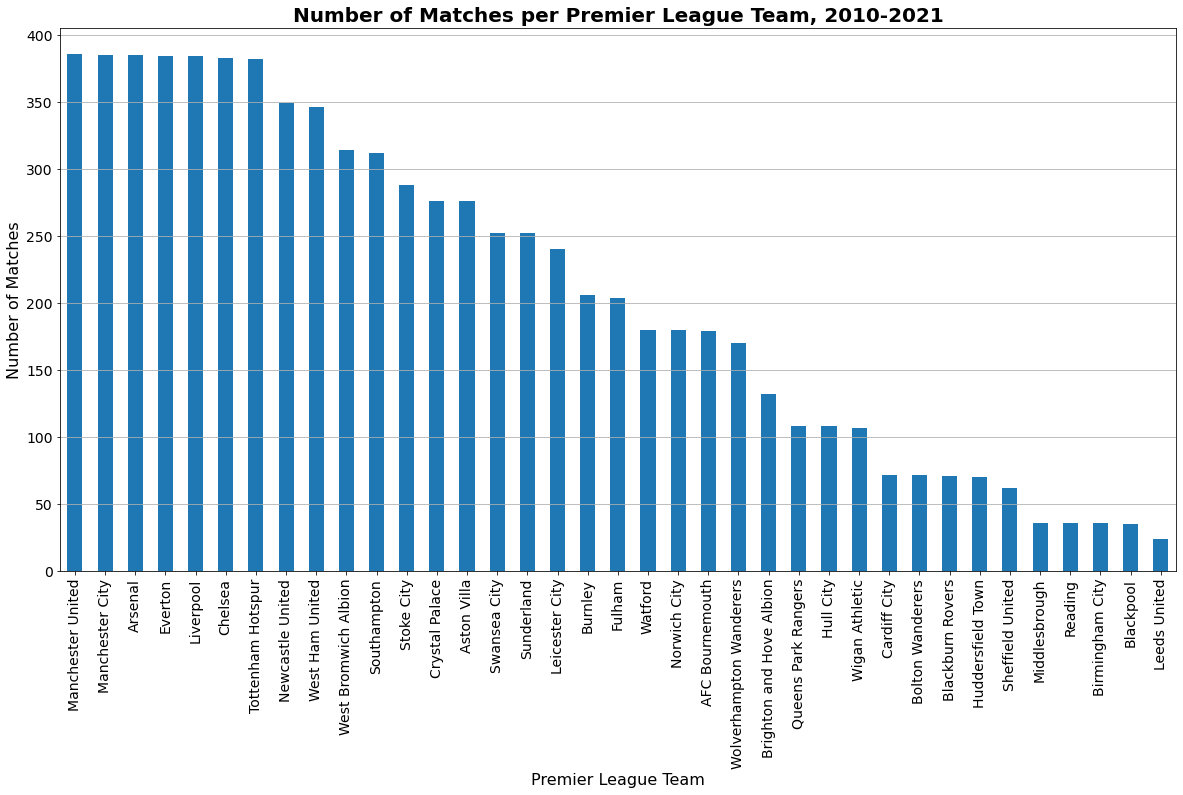

In [31]:
# Sort teams by descending number of matches
df_team = df_team.sort_values(by='Num_Matches',ascending=False)

# Forming graph
fig, ax = plt.subplots()
df_team['Num_Matches'].plot.bar(ax=ax, figsize=(20,10))

# Setting title and labels
ax.set_title('Number of Matches per Premier League Team, 2010-2021', size=20, fontweight = 'bold')
ax.set_xlabel('Premier League Team', size=16)
ax.set_ylabel('Number of Matches', size=16)

# Changing the size of the ticks 
plt.xticks(size = 14)
plt.yticks(size = 14)

# Add a grid
ax.yaxis.grid(True)
plt.show()

As shown in the graph above, the top five teams - Manchester City, Manchester United, Liverpool, Chelsea, and Arsenal - are tied for the most amount of matches played in the last decade. All five of these teams played every season. On the other hand the lowest five teams in terms of number of games played - Leeds United, Middlesbrough, Reading, Birmingham City, and Blackpool - were probably not part of the Premier League for the majority of the seasons. Each season, there are only twenty teams in the league, so we can assume that each of these teams probably only played one season.

### I. Comparing Match Result to Total Penalties

First, we can compare the match result to the total number of offsides calls, yellow cards and red cards of both teams. In order to do so, we can look at the difference in goals between the two teams to see if the spread is bigger when the total number of each penalty is greater. The goals difference is given by the column "Sg_Match_Ft". Since the current season is still running, we decided to exclude it from our analysis. 

In [32]:
#Removing the current season
df = df[df['Season'] != '20/21']

#Convert difference in goals to absolute value 
df['Sg_Match_Ft'] = df['Sg_Match_Ft'].abs()

#Convert home team and away team offsides, yellow cards and red cards to integer type 
df['Home_Offsides'] = df['Home_Offsides'].astype(int)
df['Away_Offsides'] = df['Away_Offsides'].astype(int)
df['Home_Yellow_Cards'] = df['Home_Yellow_Cards'].astype(int)
df['Away_Yellow_Cards'] = df['Away_Yellow_Cards'].astype(int)
df['Home_Red_Cards'] = df['Home_Red_Cards'].astype(int)
df['Away_Red_Cards'] = df['Away_Red_Cards'].astype(int)

#Add home team and away team offsides 
df['Total_Offsides'] = df['Home_Offsides'] + df['Away_Offsides']

#Add home team and away team yellow cards 
df['Total_Yellow_Cards'] = df['Home_Yellow_Cards'] + df['Away_Yellow_Cards']

#Add home team and away team red cards 
df['Total_Red_Cards'] = df['Home_Red_Cards'] + df['Away_Red_Cards']

#For plotting purposes
df['Match_Teams'] = df[['Home_Team', 'Away_Team']].apply(' -vs- '.join, axis=1)

<ipython-input-32-bbe36252a675>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sg_Match_Ft'] = df['Sg_Match_Ft'].abs()
<ipython-input-32-bbe36252a675>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home_Offsides'] = df['Home_Offsides'].astype(int)
<ipython-input-32-bbe36252a675>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

To have a better idea of how recurrent these penalties are, we created a chart that shows the total number of each type of penalty per season.

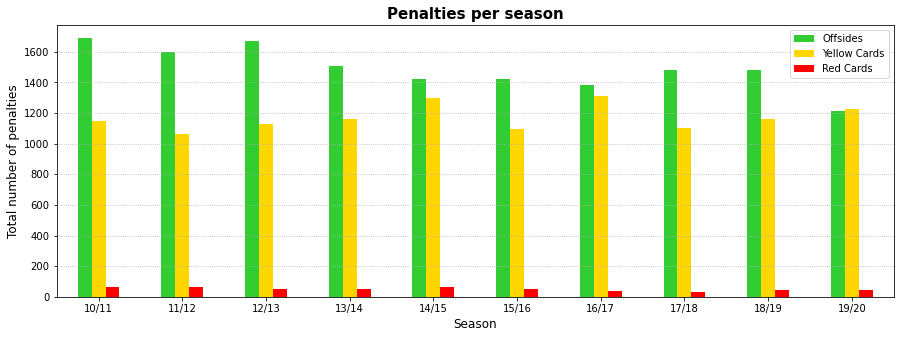

In [33]:
offsides = df.groupby('Season')[['Total_Offsides']].sum()
yellow_cards = df.groupby('Season')[['Total_Yellow_Cards']].sum()
red_cards = df.groupby('Season')[['Total_Red_Cards']].sum()
df_penalties = pd.merge(pd.merge(offsides,yellow_cards,on='Season'),red_cards,on='Season')

fig, ax = plt.subplots()
df_penalties[['Total_Offsides','Total_Yellow_Cards','Total_Red_Cards']].plot.bar(ax=ax, figsize=(15,5), color =['limegreen','gold','red'])
ax.set_title('Penalties per season', size=15, fontweight='bold')
ax.set_xlabel('Season', size = 12)
ax.set_ylabel('Total number of penalties', size = 12)
ax.legend(['Offsides','Yellow Cards', 'Red Cards'])
ax.yaxis.grid(True, linestyle=':')
ax.tick_params(axis='x', labelrotation=360)

As we can see from the chart, offsides and yellow cards are pretty common in soccer matches. On the other hand, red cards are less frequent. In fact, the total per season is less than the total number of matches per season, 380, which means most matches in each season were free of red cards. Moreover, we can see the number of offsides has been decreasing over time, while the number of yellow cards has remained mostly constant.   

Interestingly, the two variables have almost exactly no correlation (adj. r-squared = .002). To understand if this lack of correlation holds up for each type of penalty, we need to perform a similar analysis of each penalty individually.

* #### Match Result vs. Total Offsides Calls

A first approach to compare match results to the total number of offside calls is to look at the matches with the highest goals difference and the matches with the greatest number of offside calls. For example, we looked at the top 10 in the most recent completed season, 19/20. 

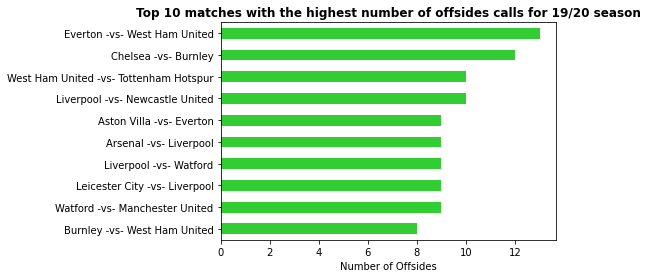

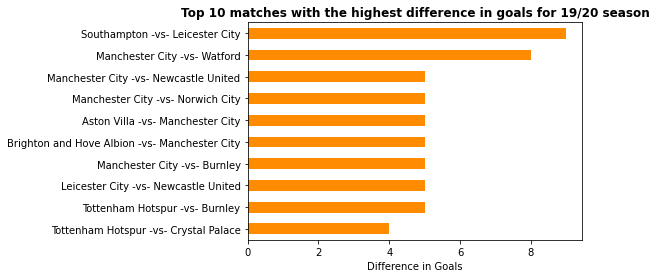

In [34]:
#Top 10 matches with the highest number of penalties for 19/20 season
df_last_season = df.loc[ df['Season'] == '19/20'].set_index(['Match_Teams'])
fig, ax = plt.subplots()
df_last_season[['Total_Offsides']].sort_values('Total_Offsides', ascending = False).head(10).plot.barh(ax=ax, color = 'limegreen')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest number of offsides calls for 19/20 season', fontweight = 'bold')
ax.set_xlabel('Number of Offsides')
ax.get_legend().remove()
ax.yaxis.label.set_visible(False)


#Top 10 matches with the highest difference in goals for 19/20 season
fig, ax = plt.subplots()
df_last_season[['Sg_Match_Ft']].sort_values('Sg_Match_Ft', ascending = False).head(10).plot.barh(ax=ax, color = 'darkorange')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in goals for 19/20 season', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Difference in Goals')
ax.yaxis.label.set_visible(False)

As we can see from the charts above, the top 10 matches with the most offsides are not the same as the matches with the greatest difference in goals scored, so it seems offsides calls do not have a big influence in the match result, or at least in increasing the score difference. We can also see how common offsides calls were during the last season to have a better idea whether or not they could potentially influence the match result.

In [35]:
df_last_season.groupby('Total_Offsides')['Link_Match'].nunique()

Total_Offsides
0     14
1     70
2     51
3     66
4     65
5     43
6     25
7     11
8      6
9      5
10     2
12     1
13     1
Name: Link_Match, dtype: int64

In [36]:
df_last_season['Total_Offsides'].sum()

1210

In [37]:
df_last_season['Total_Offsides'].mean()

3.361111111111111

We can see offside calls were actually pretty common. For the 380 matches in the season, there were 1288 offsides in total and on average there were 3.38 in each match. Moreover, there were many matches with more than 4 offsides in total from the two teams.  

In [38]:
df['Total_Offsides'].sum()

14871

In [39]:
df['Total_Offsides'].mean()

4.140033407572383

For the whole sample, offsides are also significant and the mean is even higher. Nonetheless, even if offsides are frequent, they seem to have a low impact in the match result. To prove this hypothesis, we can run a linear regression between the total number of offsides and the goals difference to see if there is any relationship 

In [40]:
reg = smf.ols('Sg_Match_Ft ~ Total_Offsides',df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Sg_Match_Ft   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.962
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0466
Time:                        13:06:45   Log-Likelihood:                -5830.1
No. Observations:                3592   AIC:                         1.166e+04
Df Residuals:                    3590   BIC:                         1.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4658      0.041     36.

As we can see from the regression results above, the coefficient on total offsides is small and it is not statistically significant since t statistic is less than 2 and p-value is greater than 5%. Therefore, we can say offside calls do not have a big impact on the match result 

In [41]:
# I tried running a scatter plot but it wasn't super good
# I also looked at each team's individual score in the match and their number of offsides in the match but the results were 
#   similar, so I dont know if it would be better to compare individually each team or the difference in goals. 
# We can also plot the teams that have had the most offsides(on average or on aggregate) but I am not sure if thats relevant 
#    for our central question


* ####  Match Result vs. Total Yellow Cards


We can first look at the average number of yellow cards there is in a match. 

In [42]:
df['Total_Yellow_Cards'].mean()

3.254175946547884

In [43]:
df['Total_Yellow_Cards'].sum()

11689

We can notice there have been less yellow cards in total compared to offsides calls and the average is lower, as shown in out graph before. Nonetheless, we can see if they have a bigger impact on match results. Again, we can start by looking at the matches with the most yellow cards received during the match and the matches with the biggest score difference. Let's use season 19/20 again as an example. 

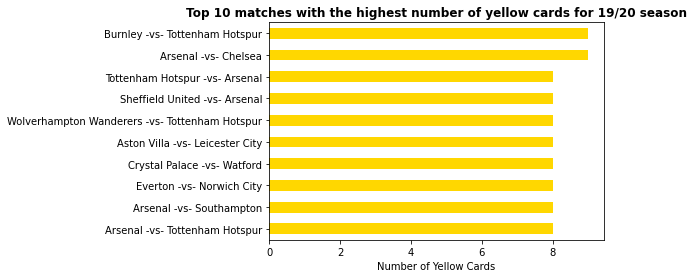

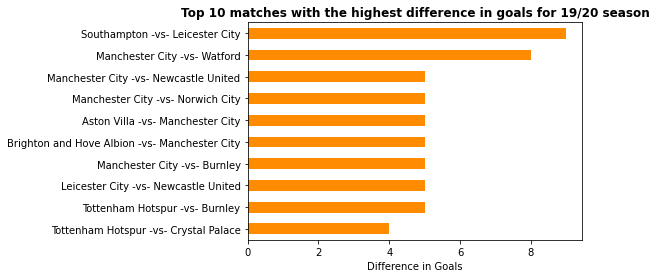

In [44]:
fig, ax = plt.subplots()
df_last_season[['Total_Yellow_Cards']].sort_values('Total_Yellow_Cards', ascending = False).head(10).plot.barh(ax=ax, color = 'gold')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest number of yellow cards for 19/20 season', fontweight = 'bold')
ax.set_xlabel('Number of Yellow Cards')
ax.yaxis.label.set_visible(False)
ax.get_legend().remove()

#Top 10 matches with the highest difference in goals for 19/20 season
fig, ax = plt.subplots()
df_last_season[['Sg_Match_Ft']].sort_values('Sg_Match_Ft', ascending = False).head(10).plot.barh(ax=ax, color = 'darkorange')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in goals for 19/20 season', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Difference in Goals')
ax.yaxis.label.set_visible(False)

From the graphs above, we can notice that, similar to offsides calls, yellow cards do not seem to be the main driver of scores differences. However, by running a linear regression we can see the coefficient on yellow cards is statistically significant although it does not add a lot of explanatory power to the difference in the scores (R-square = 2.7%). The coefficient is negative, which means the score gap would decrease as the number of yellow cards increases. Since the amount of yellow cards is the total from both teams, it can be hard to interpret the results as Total_Yellow_Cards increases if both teams get more yellow cards or just one of them.     

In [45]:
reg = smf.ols('Sg_Match_Ft ~ Total_Yellow_Cards',df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Sg_Match_Ft   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 18 May 2021   Prob (F-statistic):           7.63e-25
Time:                        13:06:46   Log-Likelihood:                -5779.0
No. Observations:                3592   AIC:                         1.156e+04
Df Residuals:                    3590   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.7557      0

* #### Match Result vs. Total Red Cards


In [46]:
df.groupby('Total_Red_Cards')['Link_Match'].nunique()

Total_Red_Cards
0    3128
1     427
2      36
3       1
Name: Link_Match, dtype: int64

In [47]:
df_last_season.groupby('Total_Red_Cards')['Link_Match'].nunique()

Total_Red_Cards
0    315
1     43
2      2
Name: Link_Match, dtype: int64

We can observe red cards are not common compared to the previous penalties. In the whole sample, we can see there was only one match where 3 red cards were given. In the last season, there were 2 matches with 2 red cards given during the match, 44 matches with 1 red card and the rest did not have any red cards. We can see if any of the 2 matches with 2 red cards is among the matches where the score gap was the biggest.  

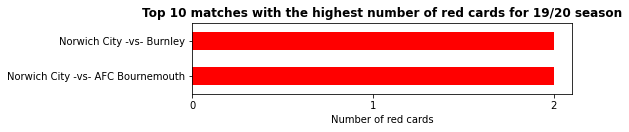

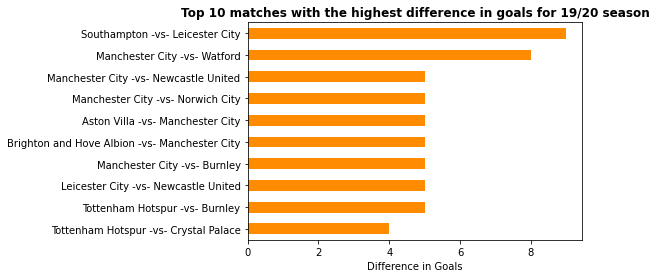

In [48]:
fig, ax = plt.subplots()
df_last_season[['Total_Red_Cards']].sort_values('Total_Red_Cards', ascending = False).head(2).plot.barh(ax=ax, color = 'red', figsize=(6.8,1.3))
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest number of red cards for 19/20 season', fontweight = 'bold')
ax.set_xlabel('Number of red cards')
ax.yaxis.label.set_visible(False)
ax.get_legend().remove()
ax.set_xticks(np.arange(0, 3, 1))

#Top 10 matches with the highest difference in goals for 19/20 season
fig, ax = plt.subplots()
df_last_season[['Sg_Match_Ft']].sort_values('Sg_Match_Ft', ascending = False).head(10).plot.barh(ax=ax, color = 'darkorange')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in goals for 19/20 season', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Difference in Goals')
ax.yaxis.label.set_visible(False)

We can notice that neither of the matches with 2 red cards during that season is among those matches where the goals difference is higher. Therefore, we can infer other factors had a bigger influence in those match results. For instance, we can look at the Southampton vs Leicester City where the score was 0-9. According to the premier league website stats for this match (https://www.premierleague.com/match/46702), Leicester City had a higher ball possession percentage, more shots, touches and passes, which seem to be factors that better explain the match result. However, the Southampton team did get a red card, which might have influenced the match result to a certain extent.      

* #### Match Result vs. Total Penalties


Finally, we can run a regression that includes all penalties to see if together they are more helpful at predicting the match result. 

In [49]:
reg = smf.ols('Sg_Match_Ft ~ Total_Offsides + Total_Yellow_Cards + Total_Red_Cards',df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Sg_Match_Ft   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     38.87
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.04e-24
Time:                        13:06:46   Log-Likelihood:                -5774.6
No. Observations:                3592   AIC:                         1.156e+04
Df Residuals:                    3588   BIC:                         1.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8199      0

We can observe from the results that only total yellow cards is statistically significant and the results are pretty similar to the regression we ran before, where we only included yellow cards as an independent variable. Therefore, we can conclude total yellow cards has more influence on match results than red cards or offsides, though our results disprove our hypothesis that each penalty type has a statistically significant negative value for match results.

* #### Supervised Learning Models

When we learned how little penalties influence the result of a match, we found ourselves asking what the correlations looked like graphically. Using sklearn's k-nearest regressors library, we analyzed penalties and match result using supervised learning.

-0.047095520618115616


<ipython-input-50-1705606ded19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Total_Offsides'>

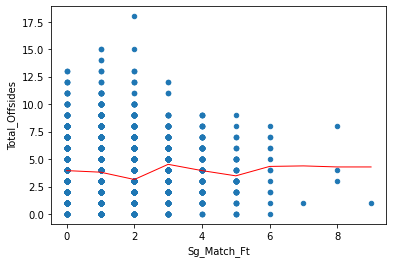

In [50]:
# 1) Match Result vs. Total Offsides Calls

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Total_Offsides'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Total_Offsides'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Total_Offsides']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Total_Offsides')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

0.030674672514111934


<ipython-input-51-00a55b42864f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Total_Yellow_Cards'>

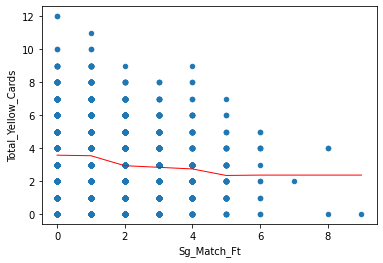

In [51]:
# 2) Match Result vs. Total Yellow Cards

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Total_Yellow_Cards'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Total_Yellow_Cards'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Total_Yellow_Cards']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Total_Yellow_Cards')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

-0.00260782109569635


<ipython-input-52-b311c9a7789f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Total_Red_Cards'>

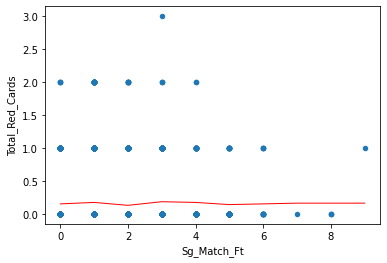

In [52]:
# 3) Match Result vs. Total Red Cards

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Total_Red_Cards'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Total_Red_Cards'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Total_Red_Cards']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Total_Red_Cards')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

<ipython-input-53-698f1bd6ea88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Penalties'] = df['Total_Offsides'] + df['Total_Yellow_Cards'] + df['Total_Red_Cards']


-0.06488327496649227


<ipython-input-53-698f1bd6ea88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Total_Penalties'>

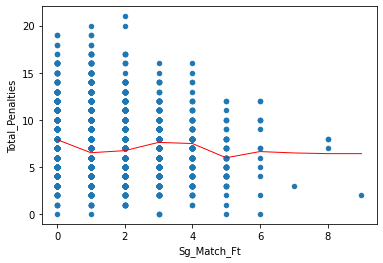

In [53]:
# 4) Match Result vs. Total Penalties

df['Total_Penalties'] = df['Total_Offsides'] + df['Total_Yellow_Cards'] + df['Total_Red_Cards']

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Total_Penalties'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Total_Penalties'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Total_Penalties']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Total_Penalties')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

In [54]:
# TODO: Discuss results of supervised learning

### II. Comparing Match Result to Difference in Penalties


Next, we will compare match result to the difference in penalties. In our previous section we compared total penalties, but this number does not tell which team had more penalties. Therefore, we thought looking at the difference in penalties could help us achieve better results.   

* #### Match Result vs. Difference in Offsides Calls


Same as in the previous section, we can start by looking at the top matches with the highest difference in offsides calls and those with the highest goals difference. Let's consider season 19/20 again as an example.

In [55]:
# Add columns with the difference in each penalty 
df['Diff_Offsides'] = (df['Home_Offsides'] - df['Away_Offsides']).abs()
df['Diff_Yellow_Cards'] = (df['Home_Yellow_Cards'] - df['Away_Yellow_Cards']).abs()
df['Diff_Red_Cards'] = (df['Home_Red_Cards'] - df['Away_Red_Cards']).abs()

<ipython-input-55-3238aab5b20b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff_Offsides'] = (df['Home_Offsides'] - df['Away_Offsides']).abs()
<ipython-input-55-3238aab5b20b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff_Yellow_Cards'] = (df['Home_Yellow_Cards'] - df['Away_Yellow_Cards']).abs()
<ipython-input-55-3238aab5b20b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

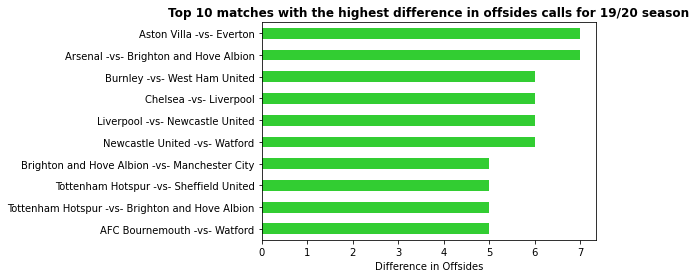

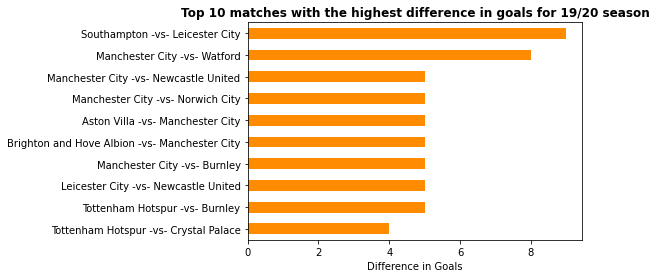

In [56]:
#Top 10 matches with the highest difference in offsides for 19/20 season
df_last_season = df.loc[ df['Season'] == '19/20'].set_index(['Match_Teams'])
fig, ax = plt.subplots()
df_last_season[['Diff_Offsides']].sort_values('Diff_Offsides', ascending = False).head(10).plot.barh(ax=ax, color = 'limegreen')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in offsides calls for 19/20 season', fontweight = 'bold')
ax.set_xlabel('Difference in Offsides')
ax.get_legend().remove()
ax.yaxis.label.set_visible(False)


#Top 10 matches with the highest difference in goals for 19/20 season
fig, ax = plt.subplots()
df_last_season[['Sg_Match_Ft']].sort_values('Sg_Match_Ft', ascending = False).head(10).plot.barh(ax=ax, color = 'darkorange')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in goals for 19/20 season', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Difference in Goals')
ax.yaxis.label.set_visible(False)

This time around we find there is a match from the top 10 with the highest difference in offsides among those with the highest score difference, Brighton and Hove Albion vs Manchester City. We can look at this match in more detail.

In [57]:
df_last_season[['Result_Full','Home_Offsides', 'Away_Offsides', 'Diff_Offsides', 'Sg_Match_Ft','Link_Match']].sort_values('Diff_Offsides', ascending = False).head(10)

,Result_Full,Home_Offsides,Away_Offsides,Diff_Offsides,Sg_Match_Ft,Link_Match
Match_Teams,,,,,,
Aston Villa -vs- Everton,2-0,8,1,7,2,https://www.premierleague.com/match/46625
Arsenal -vs- Brighton and Hove Albion,1-2,7,0,7,1,https://www.premierleague.com/match/46745
Burnley -vs- West Ham United,3-0,7,1,6,3,https://www.premierleague.com/match/46715
Chelsea -vs- Liverpool,1-2,7,1,6,1,https://www.premierleague.com/match/46657
Liverpool -vs- Newcastle United,3-1,2,8,6,2,https://www.premierleague.com/match/46648
Newcastle United -vs- Watford,1-1,6,0,6,0,https://www.premierleague.com/match/46642
Brighton and Hove Albion -vs- Manchester City,0-5,6,1,5,5,https://www.premierleague.com/match/46947
Tottenham Hotspur -vs- Sheffield United,1-1,1,6,5,0,https://www.premierleague.com/match/46723
Tottenham Hotspur -vs- Brighton and Hove Albion,2-1,5,0,5,1,https://www.premierleague.com/match/46793


We can see in this match Manchester City beat Brighton and Hove Albion, 5 to 0. The loser team got 6 offsides, while the winning team only got 1, so this might have partially influenced the match result. Although this is a particular case, we can infer offsides can affect the match result even if just a little. In the table above, some of the losing teams have more offsides than the winning team but some others do not. Therefore, we can say offsides alone do not explain much of the match result, but it can affect it in some cases together with other factors.   

* #### Match Result vs. Difference in Yellow Cards


We can compare the matches with the maximum difference in yellow cards and the matches with the biggest difference in goals. Let's see those from the last season.

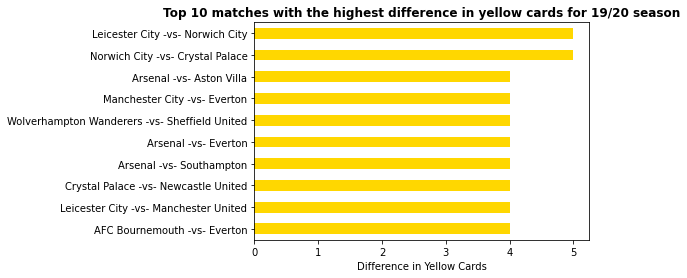

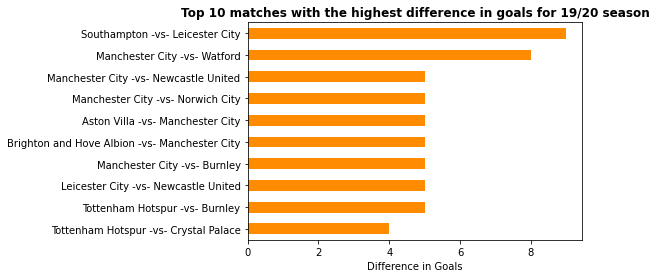

In [58]:
fig, ax = plt.subplots()
df_last_season[['Diff_Yellow_Cards']].sort_values('Diff_Yellow_Cards', ascending = False).head(10).plot.barh(ax=ax, color = 'gold')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in yellow cards for 19/20 season', fontweight = 'bold')
ax.set_xlabel('Difference in Yellow Cards')
ax.yaxis.label.set_visible(False)
ax.get_legend().remove()

#Top 10 matches with the highest difference in goals for 19/20 season
fig, ax = plt.subplots()
df_last_season[['Sg_Match_Ft']].sort_values('Sg_Match_Ft', ascending = False).head(10).plot.barh(ax=ax, color = 'darkorange')
ax.invert_yaxis()
ax.set_title('Top 10 matches with the highest difference in goals for 19/20 season', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Difference in Goals')
ax.yaxis.label.set_visible(False)

We find that having a wider difference in yellow cards does not translate to having a bigger score difference. Similar as when using the total number of yellow cards, we find that the difference in yellow cards is statistically significant but it adds little explanatory power to the match result.   

In [59]:
reg = smf.ols('Sg_Match_Ft ~ Diff_Yellow_Cards',df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Sg_Match_Ft   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.01
Date:                Tue, 18 May 2021   Prob (F-statistic):           3.80e-05
Time:                        13:06:50   Log-Likelihood:                -5823.6
No. Observations:                3592   AIC:                         1.165e+04
Df Residuals:                    3590   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4951      0.03

* #### Match Result vs. Difference in Red Cards


As we previously saw, red cards are not so recurrent, so in most cases the difference in red cards will be one or zero. Therefore, comparing it to the difference in the score of the match might not be really useful. As we can see below, in most matches the difference in red cards is zero, so we could say red cards are not really helpful to predict the result of a match.     

In [60]:
df.groupby('Diff_Red_Cards')['Link_Match'].nunique()

Diff_Red_Cards
0    3147
1     428
2      17
Name: Link_Match, dtype: int64

* #### Match Result vs. Difference in Penalties


In [61]:
reg = smf.ols('Sg_Match_Ft ~ Diff_Offsides + Diff_Yellow_Cards + Diff_Red_Cards',df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Sg_Match_Ft   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.703
Date:                Tue, 18 May 2021   Prob (F-statistic):           0.000165
Time:                        13:06:50   Log-Likelihood:                -5822.0
No. Observations:                3592   AIC:                         1.165e+04
Df Residuals:                    3588   BIC:                         1.168e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4889      0.04

By running a regression with the three penalties as independent variables, we obtain a lower R-square than using the totals. Nonetheless, we can see yellow cards is again the only variable that is statistically significant. Our results again disprove our hypothesis.

* #### Supervised Learning Models

Despite learning a difference in penalties results in the same weak correlation with match results as total penalties, we still wanted to see how a knn score and visualization looked. As we did in the first section, we again constricted a knn supervised model.

-0.033612762726788814


<ipython-input-69-5625545c551f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Diff_Offsides'>

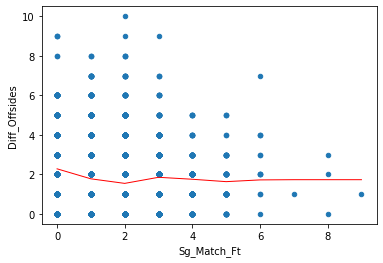

In [69]:
# 1) Match Result vs. Difference in Offsides calls

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Diff_Offsides'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Diff_Offsides'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Diff_Offsides']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Diff_Offsides')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

0.0031236724627926593


<ipython-input-70-19f8e1a6e456>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Diff_Yellow_Cards'>

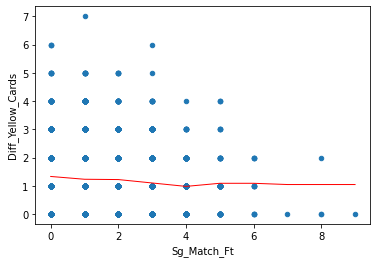

In [70]:
# 2) Match Result vs. Difference in Yellow Cards

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Diff_Yellow_Cards'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Diff_Yellow_Cards'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Diff_Yellow_Cards']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Diff_Yellow_Cards')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

-0.0007706099631834551


<ipython-input-73-7e0690fdaeb5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Diff_Red_Cards'>

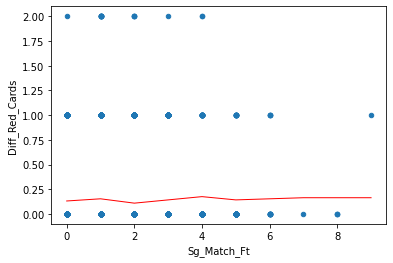

In [73]:
# 3) Match Result vs. Difference in Red Cards

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Diff_Red_Cards'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Diff_Red_Cards'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Diff_Red_Cards']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Diff_Red_Cards')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

<ipython-input-74-4851c0f155a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diff_Total_Penalties'] = df['Diff_Offsides'] + df['Diff_Yellow_Cards'] + df['Diff_Red_Cards']


-0.0211841933029433


<ipython-input-74-4851c0f155a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])


<AxesSubplot:xlabel='Sg_Match_Ft', ylabel='Diff_Total_Penalties'>

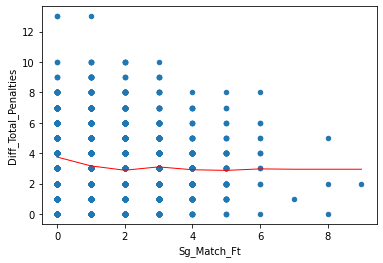

In [74]:
# 4) Match Result vs. Difference in Total Penalties

df['Diff_Total_Penalties'] = df['Diff_Offsides'] + df['Diff_Yellow_Cards'] + df['Diff_Red_Cards']

# printing scores
scores = pd.Series(dtype='float64')
for i in range(1,100,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i), X = df[['Sg_Match_Ft']], y = df['Diff_Total_Penalties'],cv=5).mean()
sklearn_knn = knn(n_neighbors=scores.idxmax()).fit(X = df[['Sg_Match_Ft']], y = df['Diff_Total_Penalties'])
print(sklearn_knn.score(X = df[['Sg_Match_Ft']], y = df['Diff_Total_Penalties']))

# graphing
df['yhat_knn'] = sklearn_knn.predict(df[['Sg_Match_Ft']])
df.plot.scatter(x='Sg_Match_Ft',y='Diff_Total_Penalties')
df.sort_values('Sg_Match_Ft').set_index('Sg_Match_Ft')['yhat_knn'].plot(color='r',lw=1)

In [63]:
#Additional visualizations 

In [64]:
offsides_team_h = df.groupby(['Home_Team'])[['Home_Offsides']].sum()
offsides_team_a = df.groupby(['Away_Team'])[['Away_Offsides']].sum()
offsides_team_a.index.names = ['Home_Team']

df_offsides = pd.merge(offsides_team_h,offsides_team_a,on = 'Home_Team')
df_offsides['Total_Offsides'] = df_offsides['Home_Offsides'] + df_offsides['Away_Offsides']
df_offsides['Num_Matches'] = df_team['Num_Matches']
df_offsides['Weighted_Average'] = df_offsides['Total_Offsides'] / df_offsides['Num_Matches']

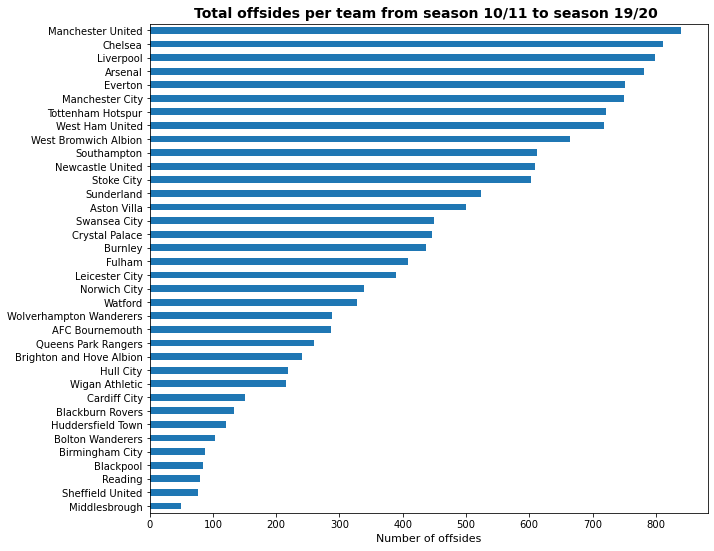

In [65]:
fig, ax = plt.subplots()
df_offsides[['Total_Offsides']].sort_values('Total_Offsides', ascending = False).head(40).plot.barh(ax=ax, figsize= (10,9))
ax.invert_yaxis()
ax.set_title('Total offsides per team from season 10/11 to season 19/20 ', size = 14, fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Number of offsides', size= 11)
ax.yaxis.label.set_visible(False)

We plotted the total number of offsides per team. However, as we saw at the beginning of our analysis, there are some teams that have played more matches than others, so we divided the total number of offsides by the number of matches each team has played.

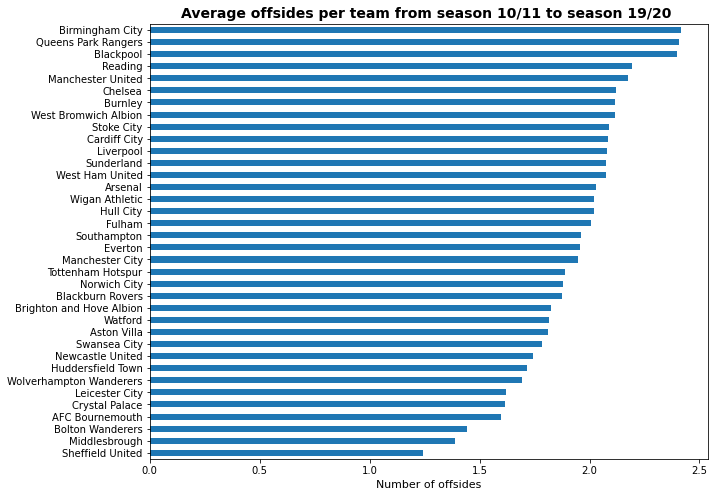

In [66]:
fig, ax = plt.subplots()
df_offsides[['Weighted_Average']].sort_values('Weighted_Average', ascending = False).head(40).plot.barh(ax=ax, figsize= (10,8))
ax.invert_yaxis()
ax.set_title('Average offsides per team from season 10/11 to season 19/20 ', size = 14, fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Number of offsides', size = 11)
ax.yaxis.label.set_visible(False)

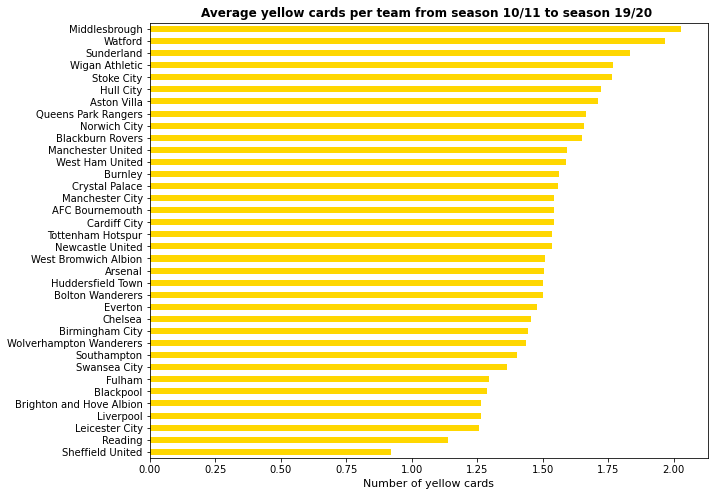

In [67]:
yellow_team_h = df.groupby(['Home_Team'])[['Home_Yellow_Cards']].sum()
yellow_team_a = df.groupby(['Away_Team'])[['Away_Yellow_Cards']].sum()
yellow_team_a.index.names = ['Home_Team']

df_yellow = pd.merge(yellow_team_h,yellow_team_a,on = 'Home_Team')
df_yellow['Total_Yellow_Cards'] = df_yellow['Home_Yellow_Cards'] + df_yellow['Away_Yellow_Cards']
df_yellow['Num_Matches'] = df_team['Num_Matches']
df_yellow['Weighted_Average'] = df_yellow['Total_Yellow_Cards'] / df_yellow['Num_Matches']

fig, ax = plt.subplots()
df_yellow[['Weighted_Average']].sort_values('Weighted_Average', ascending = False).head(40).plot.barh(ax=ax, figsize= (10,8), color ='gold')
ax.invert_yaxis()
ax.set_title('Average yellow cards per team from season 10/11 to season 19/20 ', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Number of yellow cards', size = 11)
ax.yaxis.label.set_visible(False)

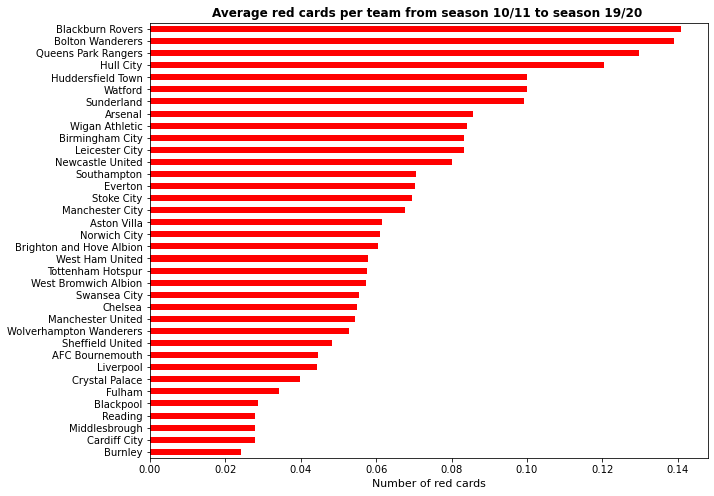

In [68]:
red_team_h = df.groupby(['Home_Team'])[['Home_Red_Cards']].sum()
red_team_a = df.groupby(['Away_Team'])[['Away_Red_Cards']].sum()
red_team_a.index.names = ['Home_Team']

df_red = pd.merge(red_team_h,red_team_a,on = 'Home_Team')
df_red['Total_Red_Cards'] = df_red['Home_Red_Cards'] + df_red['Away_Red_Cards']
df_red['Num_Matches'] = df_team['Num_Matches']
df_red['Weighted_Average'] = df_red['Total_Red_Cards'] / df_red['Num_Matches']

fig, ax = plt.subplots()
df_red[['Weighted_Average']].sort_values('Weighted_Average', ascending = False).head(40).plot.barh(ax=ax, figsize= (10,8), color ='red')
ax.invert_yaxis()
ax.set_title('Average red cards per team from season 10/11 to season 19/20 ', fontweight = 'bold')
ax.get_legend().remove()
ax.set_xlabel('Number of red cards', size = 11)
ax.yaxis.label.set_visible(False)

Manchester City won 4 out of these 10 seasons. We can see in the graphs that it has been around the middle for all of the three penalties. 